In [135]:
import pandas as pd

features = pd.read_csv('features.txt', 
                       sep='\s+', 
                       header=None, 
                       names=['idx','feature_name'])

# Build unique column names by combining the name with its original index
col_names = [
    f"{row.feature_name}_{row.idx}" 
    for row in features.itertuples()
]

# read the X data with these names
X_train = pd.read_csv('X_train.txt', 
                      sep='\s+', 
                      header=None, 
                      names=col_names)
X_test  = pd.read_csv('X_test.txt', 
                      sep='\s+', 
                      header=None, 
                      names=col_names)

y_train = pd.read_csv('y_train.txt', header=None, names=['activity_id'])
y_test  = pd.read_csv('y_test.txt',  header=None, names=['activity_id'])

activity_labels = pd.read_csv('activity_labels.txt', 
                              sep='\s+', 
                              header=None, 
                              names=['activity_id','activity_name'])

subject_train = pd.read_csv('subject_train.txt', header=None, names=['subject'])
subject_test  = pd.read_csv('subject_test.txt', header=None, names=['subject'])

train = pd.concat([subject_train, X_train, y_train], axis=1)
test  = pd.concat([subject_test, X_test, y_test],  axis=1)
data  = pd.concat([train, test], axis=0).reset_index(drop=True)
data  = data.merge(activity_labels, on='activity_id', how='left')

data.head()


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aliab\AppData\Local\Temp\ipykernel_17704\2712161562.py:4: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\aliab\AppData\Local\Temp\ipykernel_17704\2712161562.py:16: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\aliab\AppData\Local\Temp\ipykernel_17704\2712161562.py:20: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\aliab\AppData\Local\Temp\ipykernel_17704\2712161562.py:28: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


,subject,tBodyAcc-mean()-X_1,tBodyAcc-mean()-Y_2,tBodyAcc-mean()-Z_3,tBodyAcc-std()-X_4,tBodyAcc-std()-Y_5,tBodyAcc-std()-Z_6,tBodyAcc-mad()-X_7,tBodyAcc-mad()-Y_8,tBodyAcc-mad()-Z_9,...,fBodyBodyGyroJerkMag-kurtosis()_554,"angle(tBodyAccMean,gravity)_555","angle(tBodyAccJerkMean),gravityMean)_556","angle(tBodyGyroMean,gravityMean)_557","angle(tBodyGyroJerkMean,gravityMean)_558","angle(X,gravityMean)_559","angle(Y,gravityMean)_560","angle(Z,gravityMean)_561",activity_id,activity_name
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,STANDING
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,STANDING
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,STANDING
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,STANDING
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,STANDING


<Axes: xlabel='activity_name'>

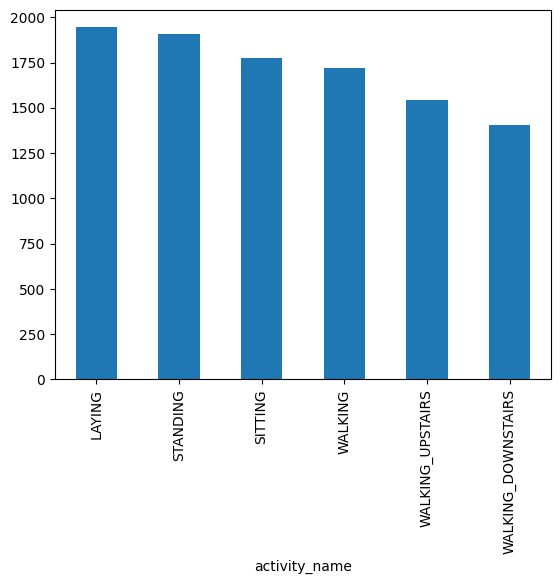

In [136]:
data['activity_name'].value_counts().plot.bar() # y values are balanced


c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\aliab\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


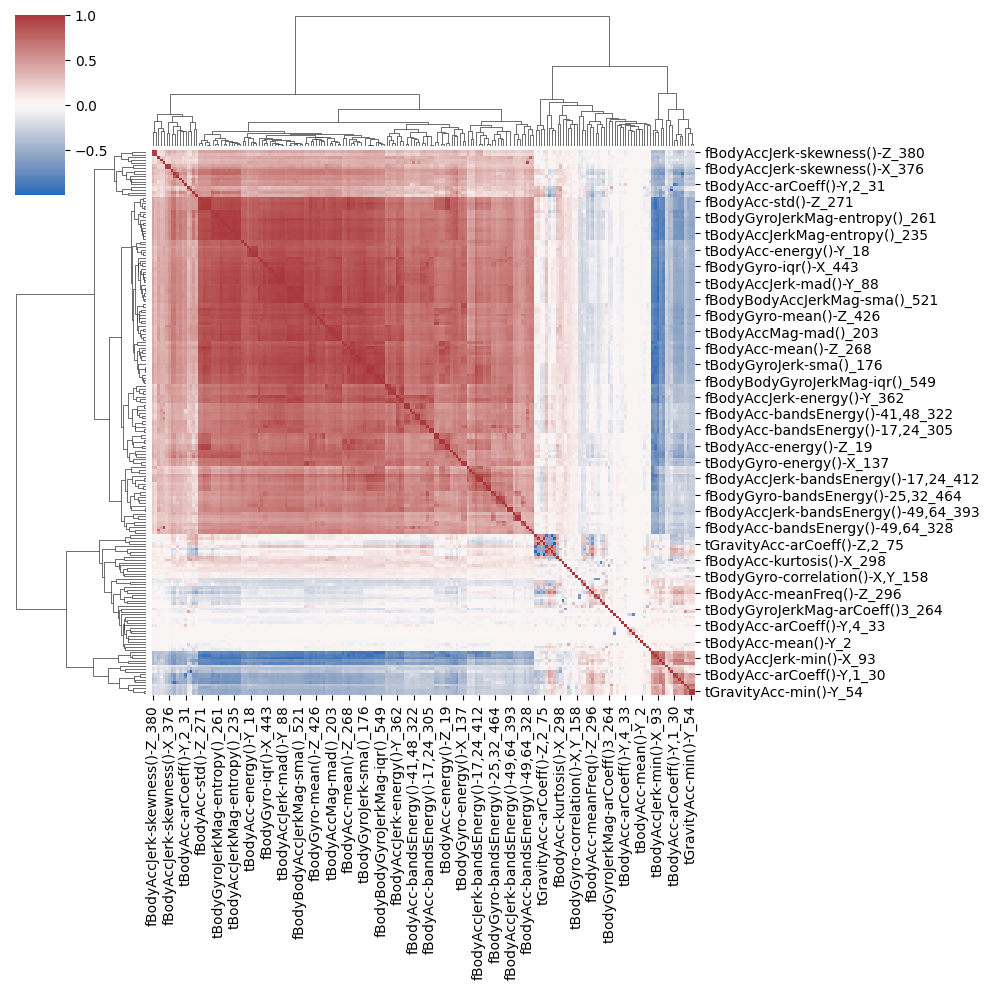

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = data.drop("activity_name", axis=1).sample(n=200, axis=1, random_state=42)
sns.clustermap(subset.corr(), 
               figsize=(10,10),
               cmap='vlag', 
               metric='euclidean', 
               method='average')
plt.show() # Too much noise to see anything useful


In [ ]:
# Compute the correlation pairs
corr = data.drop("activity_name", axis=1).corr().abs().unstack().reset_index()
corr.columns = ['feat_1', 'feat_2', 'abs_corr']

# Remove self-correlations and duplicate pairs
corr = corr[corr['feat_1'] < corr['feat_2']]

# Filter to only highly correlated pairs
high_corr = corr[corr['abs_corr'] > 0.9] \
              .sort_values('abs_corr', ascending=False)

# Build a set of features to drop:
to_drop = set()
for f1, f2, corr_val in high_corr.itertuples(index=False):
    # drop the second feature in each pair
    if f2 not in to_drop and f1 not in to_drop:
        to_drop.add(f2)

print(f"Dropping {len(to_drop)} features")

data_reduced = data.drop(columns=list(to_drop))



Dropping 335 features


In [ ]:
len(data_reduced.columns) # data reduction improved accuracy and f1 scores by reducing noise (I have tested without reduction)

229

In [141]:
from sklearn.model_selection import train_test_split
# Define the split
train_subjects = list(range(1, 25))  # Subjects 1–24
test_subjects = list(range(25, 31))  # Subjects 25–30

# Create masks
train_mask = data_reduced['subject'].isin(train_subjects)
test_mask  = data_reduced['subject'].isin(test_subjects)

# Split the data
train_data = data_reduced[train_mask].reset_index(drop=True)
test_data  = data_reduced[test_mask].reset_index(drop=True)

# separate features and labels
X_train = train_data.drop(columns=['subject', 'activity_id', 'activity_name'])
y_train = train_data['activity_name']

X_test = test_data.drop(columns=['subject', 'activity_id', 'activity_name'])
y_test = test_data['activity_name']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (6410, 226)
X_val shape: (1603, 226)
X_test shape: (2286, 226)


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=50,
                            random_state=42,
                            n_jobs=-1,
                            max_depth=8, 
                            # max_depth=10 resulted in 97% val accuracy and 93% test accuracy -> not worth it and might be overfitting
                            min_samples_split=5,
                            min_samples_leaf=3,
                            #max_features='sqrt',
                            )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       300
           SITTING       0.93      0.92      0.92       274
          STANDING       0.93      0.93      0.93       295
           WALKING       0.99      0.99      0.99       272
WALKING_DOWNSTAIRS       0.96      0.96      0.96       220
  WALKING_UPSTAIRS       0.95      0.96      0.96       242

          accuracy                           0.96      1603
         macro avg       0.96      0.96      0.96      1603
      weighted avg       0.96      0.96      0.96      1603



<Axes: >

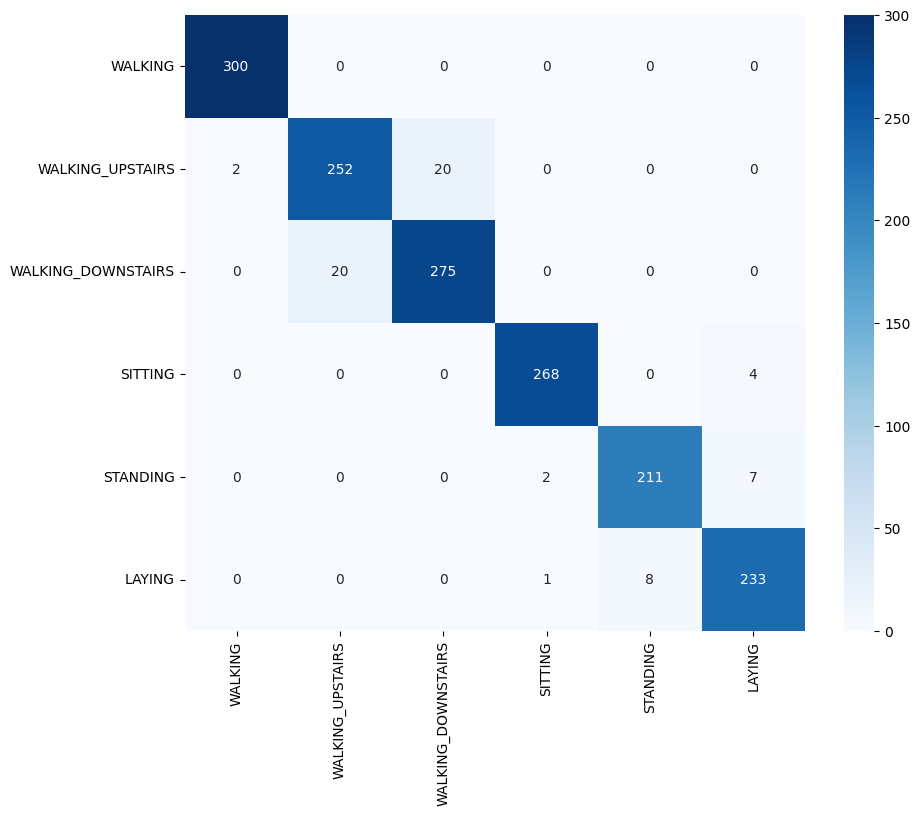

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=activity_labels['activity_name'], 
            yticklabels=activity_labels['activity_name'])

In [155]:
y_pred_test = rf.predict(X_test)
print(classification_report(y_test, y_pred_test))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       442
           SITTING       0.87      0.90      0.89       407
          STANDING       0.90      0.87      0.89       431
           WALKING       1.00      0.96      0.98       362
WALKING_DOWNSTAIRS       1.00      0.86      0.92       308
  WALKING_UPSTAIRS       0.85      1.00      0.92       336

          accuracy                           0.93      2286
         macro avg       0.94      0.93      0.93      2286
      weighted avg       0.94      0.93      0.93      2286



<Axes: >

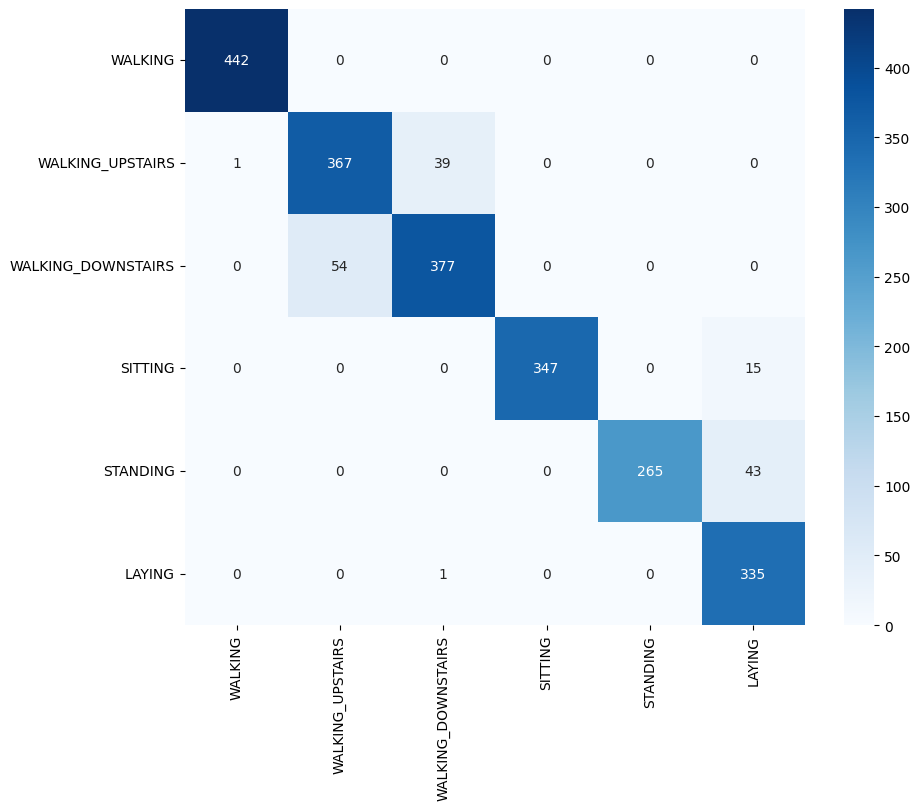

In [156]:
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=activity_labels['activity_name'], 
            yticklabels=activity_labels['activity_name'])